Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [57]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/ksutar/OneDrive - NVIDIA Corporation/workspace\masters-data/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/ksutar/OneDrive - NVIDIA Corporation/workspace/masters-data/CNN/CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [58]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [59]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [60]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [61]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [62]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [63]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

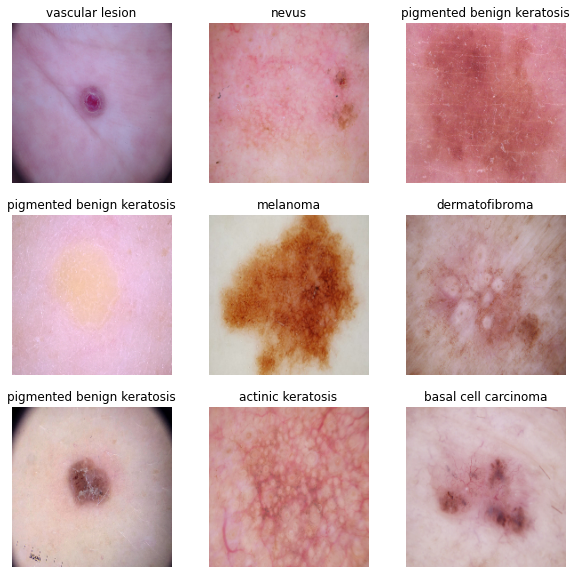

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [76]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [92]:
#x_train = list(map(lambda x: x[0], train_ds))
#y_train = list(map(lambda x: x[1], train_ds))

In [78]:
#x_test = list(map(lambda x: x[0], val_ds))
#y_test = list(map(lambda x: x[1], val_ds))

In [79]:
# flatten the list to get the data in correct shape
##import itertools
#X_train = np.asarray(list(itertools.chain.from_iterable(x_train)))
#X_test = np.asarray(list(itertools.chain.from_iterable(x_test)))
#Y_train = np.asarray(list(itertools.chain.from_iterable(y_train)))
#Y_test = np.asarray(list(itertools.chain.from_iterable(y_test)))
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

(1792, 180, 180, 3)
(447, 180, 180, 3)
(1792,)
(447,)


In [81]:
# convert class labels (from digits) to one-hot encoded vectors
#number_of_classes=9
#Y_train = tf.keras.utils.to_categorical(Y_train, number_of_classes)
#Y_test = tf.keras.utils.to_categorical(Y_test, number_of_classes)
#print(Y_train.shape)
#Y_train[0]


(1792, 9)


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [83]:
### Your code goes here
# convert int to float
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

# normalise
#X_train /= 255
#X_test /= 255

In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third conv layer
model.add(Conv2D(128, (3, 3),  padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
#model.add(Dense(128, activation='relu')) # fully connected
model.add(Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(9, activation='softmax'))

# model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 90, 90, 64)      

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [87]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [88]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 90, 90, 64)      

### Train the model

In [91]:
tf.config.run_functions_eagerly(True)

epochs = 20
history = model.fit(
          train_ds,
          validation_data=val_ds,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
56/56 [==============================] - 182s 3s/step - loss: 15.2642 - accuracy: 0.3030 - val_loss: 13.7826 - val_accuracy: 0.1678
Epoch 2/20
56/56 [==============================] - 181s 3s/step - loss: 11.6078 - accuracy: 0.4364 - val_loss: 12.0976 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 177s 3s/step - loss: 11.1779 - accuracy: 0.4950 - val_loss: 12.3268 - val_accuracy: 0.3289
Epoch 4/20
56/56 [==============================] - 173s 3s/step - loss: 10.9018 - accuracy: 0.5151 - val_loss: 12.5398 - val_accuracy: 0.3400
Epoch 5/20
56/56 [==============================] - 154s 3s/step - loss: 10.6627 - accuracy: 0.5357 - val_loss: 12.5909 - val_accuracy: 0.3289
Epoch 6/20
56/56 [==============================] - 156s 3s/step - loss: 10.3473 - accuracy: 0.5597 - val_loss: 11.5155 - val_accuracy: 0.4609
Epoch 7/20
56/56 [==============================] - 521s 9s/step - loss: 10.1063 - accuracy: 0.5731 - val_loss: 11.9263 - val_accuracy: 0.4966

### Visualizing training results

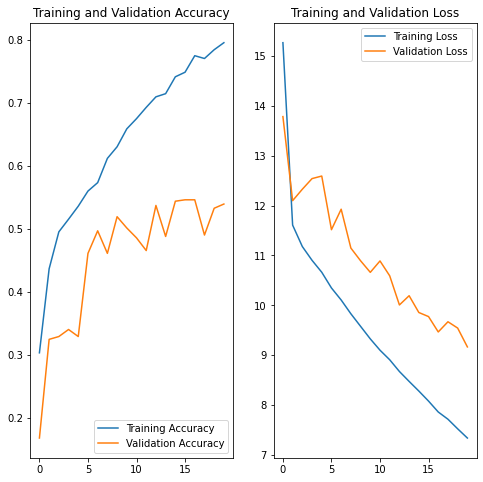

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings

The training accuracy keeps on increasing but the validation accuracy is platoing towards end for the model. This means the model is overfitting.

In [1]:
#pip install tensorflow --upgrade

In [94]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
tf.config.run_functions_eagerly(True)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

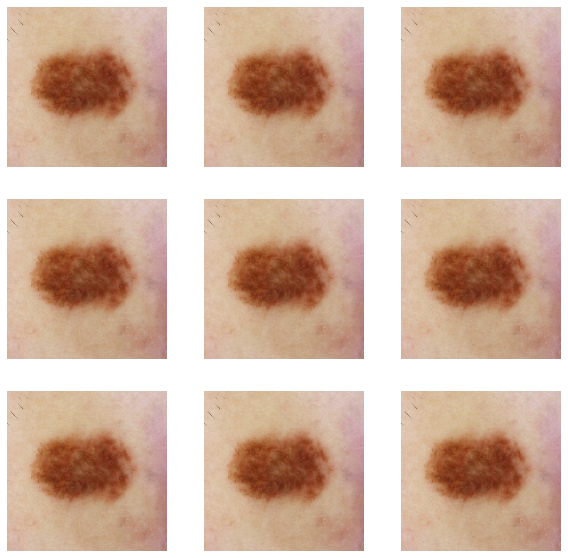

In [95]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Create the model, compile and train the mode

In [96]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# model
model = Sequential()
# adding augmentation
model.add(data_augmentation),
# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third conv layer
model.add(Conv2D(128, (3, 3),  padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
#model.add(Dense(128, activation='relu')) # fully connected
model.add(Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(9, activation='softmax'))

# model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)       

### Compiling the model

In [99]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)       

### Training the model

In [100]:
tf.config.run_functions_eagerly(True)

epochs = 20
#history = model.fit(X_train, Y_train,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#          validation_data=(X_test, Y_test))

history = model.fit(
          train_ds,
          validation_data=val_ds,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
56/56 [==============================] - 232s 4s/step - loss: 14.8749 - accuracy: 0.2684 - val_loss: 12.9374 - val_accuracy: 0.2506
Epoch 2/20
56/56 [==============================] - 173s 3s/step - loss: 11.7036 - accuracy: 0.3806 - val_loss: 11.7886 - val_accuracy: 0.2327
Epoch 3/20
56/56 [==============================] - 157s 3s/step - loss: 11.3550 - accuracy: 0.4146 - val_loss: 11.3403 - val_accuracy: 0.4228
Epoch 4/20
56/56 [==============================] - 168s 3s/step - loss: 11.0649 - accuracy: 0.4381 - val_loss: 11.6847 - val_accuracy: 0.3221
Epoch 5/20
56/56 [==============================] - 159s 3s/step - loss: 10.7919 - accuracy: 0.4492 - val_loss: 12.0338 - val_accuracy: 0.3110
Epoch 6/20
56/56 [==============================] - 162s 3s/step - loss: 10.5772 - accuracy: 0.4665 - val_loss: 10.7887 - val_accuracy: 0.4407
Epoch 7/20
56/56 [==============================] - 168s 3s/step - loss: 10.3435 - accuracy: 0.4844 - val_loss: 11.0539 - val_accuracy: 0.3356

### Visualizing the results

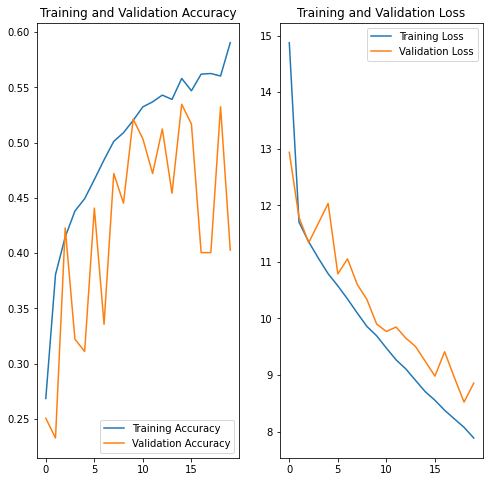

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings

This time the validation accuracy looks better and is showing same trendas training. The overall accuracy is low but the in comparison accuracy have increased for the validation set. So, the overfitting issue is getting addressed.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

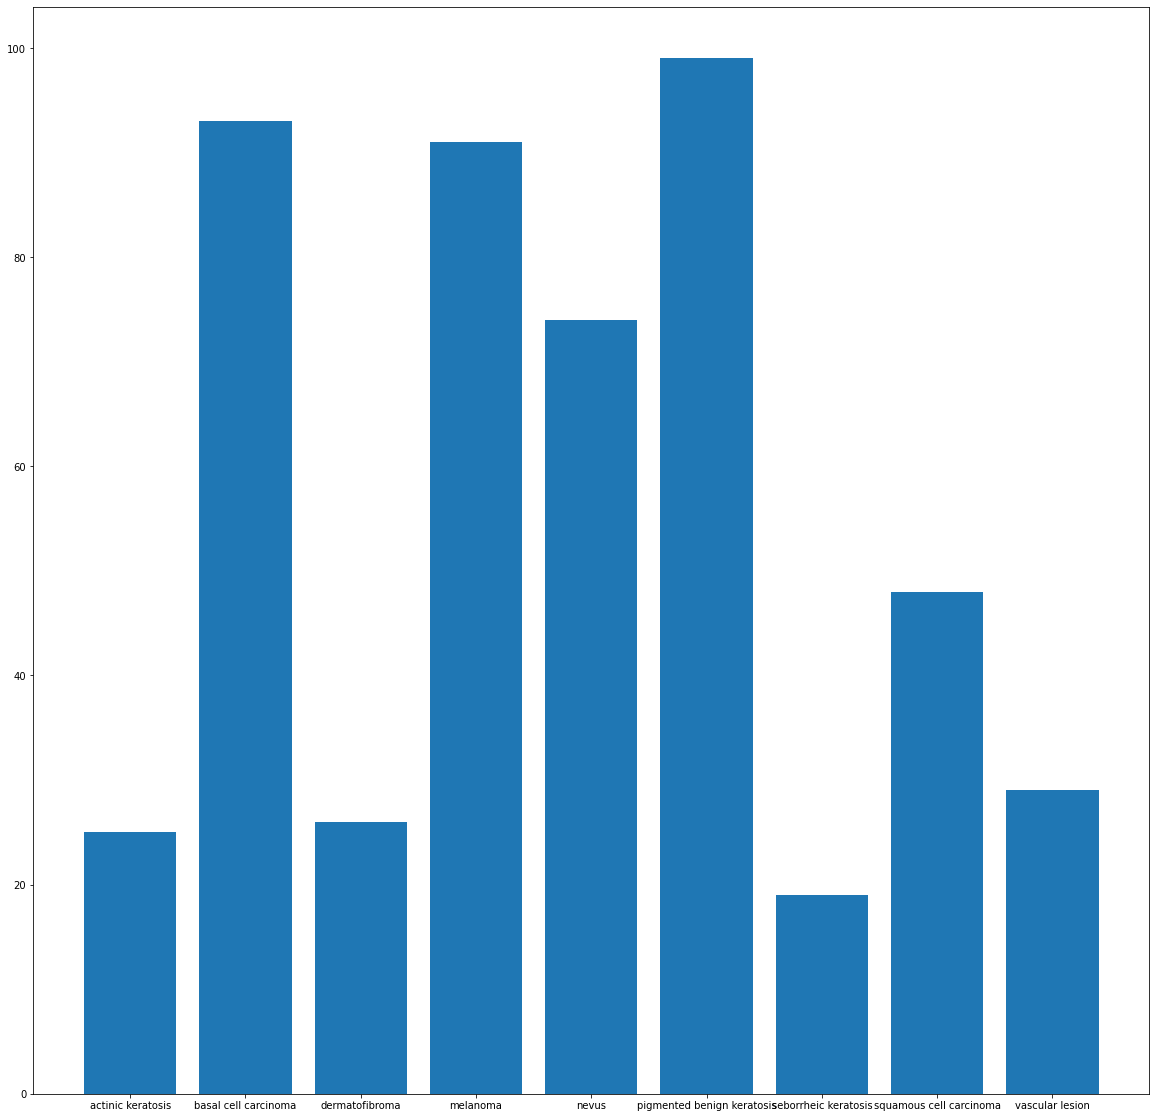

In [102]:
# CHecking class imbalances
class_data = dict()

# adding the empty lists for each class record in the dictionary
for i in class_names:
    class_data[i] = []

# setting the output image size
plt.figure(figsize=(10, 10))
# adding the images into the data dictionary for each class
for images, labels in train_ds:
    for i in range(9):
        class_data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))
        
# storing the number of images for specific class
for i in class_data:
    # getting the length and storing the dictionary
    class_data[i] = len(class_data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
# printing the plot
plt.bar(range(len(class_data)), list(class_data.values()), align='center')
plt.xticks(range(len(class_data)), list(class_data.keys()))
plt.show()



#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
basal cell carcinoma

melanoma

pigmented benign keratosis

squamous cell carcinoma

In [103]:
print(class_data)

{'actinic keratosis': 25, 'basal cell carcinoma': 93, 'dermatofibroma': 26, 'melanoma': 91, 'nevus': 74, 'pigmented benign keratosis': 99, 'seborrheic keratosis': 19, 'squamous cell carcinoma': 48, 'vascular lesion': 29}


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [104]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [139]:
path_to_training_dataset=r"C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF22AEF250>:   2%| | 8/500 [00:00<00:49,  9.93 Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF22B0DAF0>: 100%|█| 500/500 [00:05<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF22AE2190>:   2%| | 8/500 [00:00<01:18,  6.31 Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF2974FAC0>: 100%|█| 500/500 [00:05<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF29641310>: 100%|█| 500/500 [00:06<00:00, 81.93 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FF1AA14970>: 100%|█| 500/500 [00:25<00:00, 19.76 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1FF29C14580>: 100%|█| 500/500 [00:25<00:00, 19.89 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF1BE8B730>:   0%| | 1/500 [00:00<01:31,  5.45 Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF19F9D220>: 100%|█| 500/500 [00:08<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FF22AA7CA0>: 100%|█| 500/500 [00:17<00:00, 28.62 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF22BD6310>: 100%|█| 500/500 [00:05<00:00, 88.19 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF29BDA670>:   0%| | 2/500 [00:00<00:39, 12.61 Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF2B4BF460>: 100%|█| 500/500 [00:05<00:00, 83.96 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [140]:
#path_to_training_dataset='C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\'
image_count_train = len(list(path_to_training_dataset.glob('*/output/*.jpg')))
print(image_count_train)

AttributeError: 'str' object has no attribute 'glob'

### Lets see the distribution of augmented data after adding new images to the original training data.

In [141]:
# importing glob to find files recursively
from glob import glob

path_list = [x for x in glob(os.path.join(path_to_training_dataset, '*','output', '*.jpg'))]
path_list

['C:\\\\Users\\\\ksutar\\\\workspace\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0dea6277-adba-4e38-b89f-cb9a2b7b7ece.jpg',
 'C:\\\\Users\\\\ksutar\\\\workspace\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3d16f21a-438e-4cb2-8746-2613d3dc9626.jpg',
 'C:\\\\Users\\\\ksutar\\\\workspace\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_48beb06b-5086-4f43-95bb-1de0182295f2.jpg',
 'C:\\\\Users\\\\ksutar\\\\workspace\\\\Skin cancer ISIC The International Skin Imaging Collaboration\\\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b7a63b2e-7aca-4c01-bd45-39ed00c2b56c.jpg',
 'C:\\\\Users\\\\ksutar\\\\workspace\\\\Skin cancer ISIC The International Skin Imaging Collabor

In [142]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(path_to_training_dataset, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [144]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [145]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [146]:
new_df['Label'].value_counts()

dermatofibroma                500
actinic keratosis             500
squamous cell carcinoma       500
basal cell carcinoma          500
vascular lesion               500
melanoma                      500
seborrheic keratosis          500
pigmented benign keratosis    500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [147]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [148]:
data_dir_train="C:\\Users\\ksutar\\workspace\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [149]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [151]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#normalizing the Data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.074443385 0.8762003


In [152]:

# model
model = Sequential()

# adding augmentation
model.add(data_augmentation),
# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third conv layer
model.add(Conv2D(128, (3, 3),  padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
#model.add(Dense(128, activation='relu')) # fully connected
model.add(Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(9, activation='softmax'))

# model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [153]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [154]:
epochs = 30
history = model.fit(
          train_ds,
          validation_data=val_ds,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/30
169/169 [==============================] - 622s 4s/step - loss: 13.0360 - accuracy: 0.2782 - val_loss: 12.8324 - val_accuracy: 0.3229
Epoch 2/30
169/169 [==============================] - 544s 3s/step - loss: 10.9485 - accuracy: 0.3900 - val_loss: 12.0160 - val_accuracy: 0.3289
Epoch 3/30
169/169 [==============================] - 530s 3s/step - loss: 10.2632 - accuracy: 0.4162 - val_loss: 10.5910 - val_accuracy: 0.4001
Epoch 4/30
169/169 [==============================] - 536s 3s/step - loss: 9.6394 - accuracy: 0.4546 - val_loss: 9.9060 - val_accuracy: 0.4046
Epoch 5/30
169/169 [==============================] - 524s 3s/step - loss: 9.0677 - accuracy: 0.4763 - val_loss: 10.1320 - val_accuracy: 0.3987
Epoch 6/30
169/169 [==============================] - 531s 3s/step - loss: 8.5258 - accuracy: 0.4885 - val_loss: 9.0114 - val_accuracy: 0.4551
Epoch 7/30
169/169 [==============================] - 548s 3s/step - loss: 8.0325 - accuracy: 0.5083 - val_loss: 8.8037 - val_accuracy:

#### **Todo:**  Visualize the model results

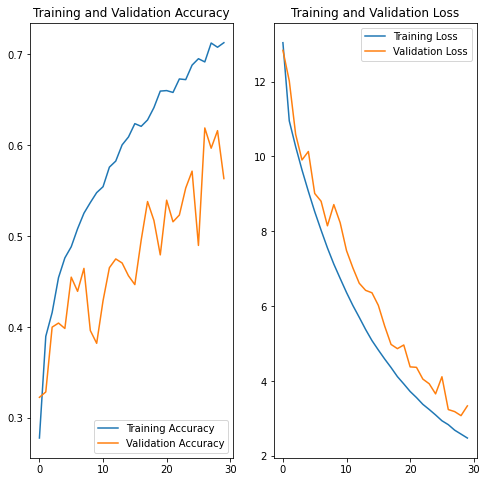

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Both training and validation accuracies have improved. As they are in same trend, it does not look like overfitting anymore.CLass rebalancing have definitely helped improving the accuracy.
